# **Dataset plots**

In [ ]:
# Download all COCO + VQA v2 zip files
!wget -nc http://images.cocodataset.org/zips/train2014.zip
!wget -nc http://images.cocodataset.org/zips/val2014.zip
!wget -nc https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Questions_Train_mscoco.zip
!wget -nc https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Questions_Val_mscoco.zip
!wget -nc https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Annotations_Train_mscoco.zip
!wget -nc https://s3.amazonaws.com/cvmlp/vqa/mscoco/vqa/v2_Annotations_Val_mscoco.zip

In [2]:
# Unzip all files
!unzip -q train2014.zip
!unzip -q val2014.zip
!unzip -q v2_Questions_Train_mscoco.zip
!unzip -q v2_Questions_Val_mscoco.zip
!unzip -q v2_Annotations_Train_mscoco.zip
!unzip -q v2_Annotations_Val_mscoco.zip

!rm *.zip

In [3]:
# import required libraries
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import re
import pickle
from matplotlib.pyplot import imshow

In [4]:
# questions
questions_val_json = '/content/v2_OpenEnded_mscoco_val2014_questions.json'
questions_train_json = '/content/v2_OpenEnded_mscoco_train2014_questions.json'

# annotations
annotations_train_json = '/content/v2_mscoco_train2014_annotations.json'
annotations_val_json = '/content/v2_mscoco_val2014_annotations.json'

# images
images_train_folder = '/content/train2014'
images_val_folder = '/content/val2014'

In [5]:
# loading json files as json lists
train_questions_list = json.load(open(questions_train_json))
val_questions_list = json.load(open(questions_val_json))
train_annotations_list = json.load(open(annotations_train_json))
val_annotations_list = json.load(open(annotations_val_json))

In [6]:
# extracting questions, answers, multiple_choice_answer and answer type
train_list = train_questions_list['questions']
val_list = val_questions_list['questions']
for i in range(len(train_list)):
    train_list[i]['multiple_choice_answer'] = train_annotations_list['annotations'][i]['multiple_choice_answer']
    train_list[i]['answers'] = train_annotations_list['annotations'][i]['answers']
    train_list[i]['answer_type'] = train_annotations_list['annotations'][i]['answer_type']
for i in range(len(val_list)):
    val_list[i]['multiple_choice_answer'] = val_annotations_list['annotations'][i]['multiple_choice_answer']
    val_list[i]['answers'] = val_annotations_list['annotations'][i]['answers']
    val_list[i]['answer_type'] = val_annotations_list['annotations'][i]['answer_type']

In [7]:
print('N° of train samples : ' , len(train_list))
print('N° of val samples : ' , len(val_list))

N° of train samples :  443757
N° of val samples :  214354


In [10]:
def make_df(json_list):
    answer_type = []
    multiple_choice_answer = []
    image_id = []
    question = []
    for i in range(len(json_list)):
        answer_type.append(json_list[i]['answer_type'])
        multiple_choice_answer.append(json_list[i]['multiple_choice_answer'])
        image_id.append(json_list[i]['image_id'])
        question.append(json_list[i]['question_id'])
    return pd.DataFrame(zip(answer_type, multiple_choice_answer, image_id, question), columns = ['answer_type', 'multiple_choice_answer', 'image_id', 'question_id'])


In [11]:
train_df = make_df(train_list)
val_df = make_df(val_list)

In [12]:
print(train_df.head())
print(val_df.head())

  answer_type multiple_choice_answer  image_id  question_id
0       other                    net    458752    458752000
1       other                pitcher    458752    458752001
2       other                 orange    458752    458752002
3      yes/no                    yes    458752    458752003
4       other                  white    262146    262146000
  answer_type multiple_choice_answer  image_id  question_id
0       other                   down    262148    262148000
1       other               watching    262148    262148001
2       other           picnic table    262148    262148002
3       other         foodiebakercom    393225    393225000
4      yes/no                     no    393225    393225001


### **Plots**

In [13]:
def extract_vqa_data_from_list(data_list, question_id, images_base_path, image_prefix='COCO_train2014_'):
    # Find the entry by question_id
    item = next((entry for entry in data_list if entry['question_id'] == question_id), None)
    if item is None:
        raise ValueError(f"Question ID {question_id} not found in the list.")

    question_text = item['question']
    image_id = item['image_id']

    # Format image file name
    image_id_str = str(image_id).rjust(12, '0')
    image_filename = f"{image_prefix}{image_id_str}.jpg"
    image_path = os.path.join(images_base_path, image_filename)

    # Load image
    img = Image.open(image_path)

    return {
        'question_text': question_text,
        'image': img,
        'multiple_choice_answer': item['multiple_choice_answer'],
        'all_answers': [ans['answer'] for ans in item['answers']],
        'answer_type': item['answer_type'],
        'image_path': image_path
    }

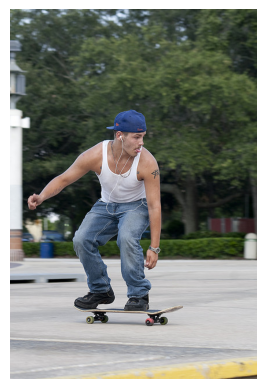

Question: What color is his hat?
Multiple Choice Answer: blue
All Answers: ['backwards', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue']
Answer Type: other
Image Path: /content/train2014/COCO_train2014_000000393227.jpg


In [14]:
question_id = train_list[30]['question_id']
data = extract_vqa_data_from_list(train_list, question_id, images_train_folder)

plt.imshow(data['image'])
plt.axis('off')
plt.show()

print("Question:", data['question_text'])
print("Multiple Choice Answer:", data['multiple_choice_answer'])
print("All Answers:", data['all_answers'])
print("Answer Type:", data['answer_type'])
print("Image Path:", data['image_path'])

- **Train**

No of train samples :  443757


/tmp/ipython-input-15-360615727.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(ax.patches[i].get_x()+0.02, ax.patches[i].get_height(), str( round(percentages[i], 2))+'%')


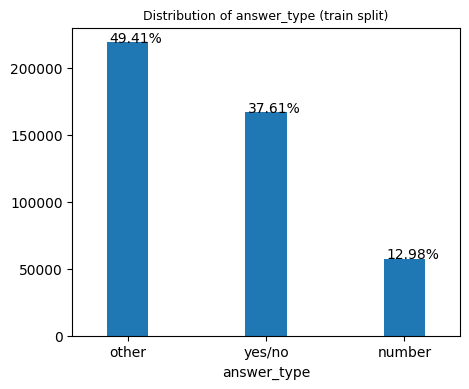

In [15]:
print('No of train samples : ' , len(train_list))

ax = train_df['answer_type'].value_counts().plot(kind='bar', figsize=(5,4), rot = 0, width = 0.3)
percentages = (train_df['answer_type'].value_counts()/ len(train_df) *100)[:10]
ax.set_title("Distribution of answer_type (train split)", size = 9)

for i in range(len(percentages)):
    ax.text(ax.patches[i].get_x()+0.02, ax.patches[i].get_height(), str( round(percentages[i], 2))+'%')

plt.rcParams["figure.dpi"] = 120
plt.show()

/tmp/ipython-input-16-840903456.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(ax.patches[i].get_width()+0.35, ax.patches[i].get_y()+0.35, str( round(percentages[i], 2))+'%', size = 8)


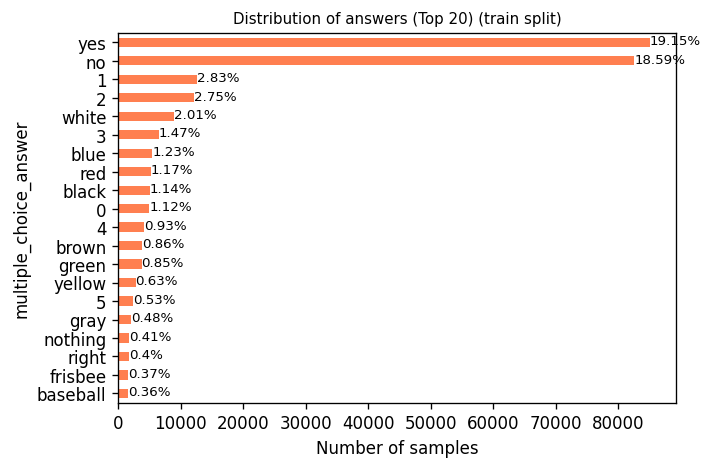

In [16]:
ax = train_df['multiple_choice_answer'].value_counts()[:20].plot(kind='barh', color = 'coral', figsize=(6,4))
percentages = (train_df['multiple_choice_answer'].value_counts()/ len(train_df) *100)[:20]
ax.set_title("Distribution of answers (Top 20) (train split)", size = 9)
ax.set_xlabel("Number of samples")

for i in range(len(percentages)):
    ax.text(ax.patches[i].get_width()+0.35, ax.patches[i].get_y()+0.35, str( round(percentages[i], 2))+'%', size = 8)

ax.invert_yaxis()
plt.rcParams["figure.dpi"] = 120
plt.show()

- **Validation**

No of val samples :  214354


/tmp/ipython-input-17-1362996790.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(ax.patches[i].get_x()+0.02, ax.patches[i].get_height(), str( round(percentages[i], 2))+'%')


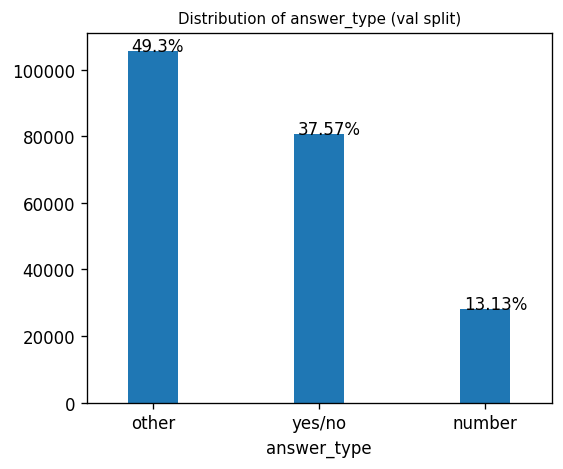

In [17]:
print('No of val samples : ' , len(val_list))

ax = val_df['answer_type'].value_counts().plot(kind='bar', figsize=(5,4), rot = 0, width = 0.3)
percentages = (val_df['answer_type'].value_counts()/ len(val_df) *100)[:10]
ax.set_title("Distribution of answer_type (val split)", size = 9)

for i in range(len(percentages)):
    ax.text(ax.patches[i].get_x()+0.02, ax.patches[i].get_height(), str( round(percentages[i], 2))+'%')

plt.rcParams["figure.dpi"] = 120
plt.show()

/tmp/ipython-input-18-3559219597.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.text(ax.patches[i].get_width()+0.35, ax.patches[i].get_y()+0.35, str( round(percentages[i], 2))+'%', size = 8)


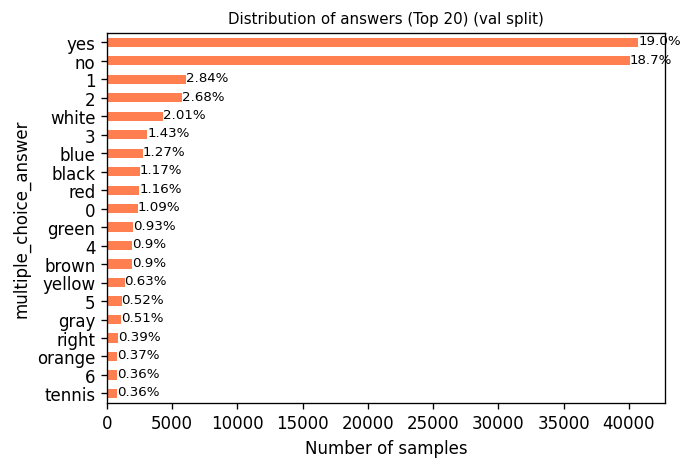

In [18]:
ax = val_df['multiple_choice_answer'].value_counts()[:20].plot(kind='barh', color = 'coral', figsize=(6,4))
percentages = (val_df['multiple_choice_answer'].value_counts()/ len(val_df) *100)[:20]
ax.set_title("Distribution of answers (Top 20) (val split)", size = 9)
ax.set_xlabel("Number of samples")

for i in range(len(percentages)):
    ax.text(ax.patches[i].get_width()+0.35, ax.patches[i].get_y()+0.35, str( round(percentages[i], 2))+'%', size = 8)

ax.invert_yaxis()
plt.rcParams["figure.dpi"] = 120
plt.show()